In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline


In [3]:
ted = pd.read_csv('E:/datas/ted_main.csv')

In [4]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [6]:
ted.head(3).append(ted.tail(3))

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309
2549,8,With more than half of the world population li...,519,TED2017,1492992000,1,Karoliina Korppoo,Karoliina Korppoo: How a video game might help...,1,1506092422,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",Game designer,"['cities', 'design', 'future', 'infrastructure...",How a video game might help us build better ci...,https://www.ted.com/talks/karoliina_korppoo_ho...,391721


In [7]:
# 调整字段顺序
ted = ted[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']]
ted.head(3).append(ted.tail(3))

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,1140825600,1151367060,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,1140825600,1151367060,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,1140739200,1151367060,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292
2547,Radhika Nagpal: What intelligent machines can ...,What intelligent machines can learn from a sch...,Science fiction visions of the future show us ...,Radhika Nagpal,Robotics engineer,1,651,TED2017,1492992000,1506006095,10,"['AI', 'ants', 'fish', 'future', 'innovation',...",1,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/radhika_nagpal_what_...,375647
2548,Theo E.J. Wilson: A black man goes undercover ...,A black man goes undercover in the alt-right,In an unmissable talk about race and politics ...,Theo E.J. Wilson,Public intellectual,1,1100,TEDxMileHigh,1499472000,1506024042,32,"['Internet', 'TEDx', 'United States', 'communi...",1,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309
2549,Karoliina Korppoo: How a video game might help...,How a video game might help us build better ci...,With more than half of the world population li...,Karoliina Korppoo,Game designer,1,519,TED2017,1492992000,1506092422,8,"['cities', 'design', 'future', 'infrastructure...",1,"[{'id': 21, 'name': 'Unconvincing', 'count': 2...","[{'id': 2682, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/karoliina_korppoo_ho...,391721


In [11]:
# 拍摄时间和发布时间是用时间戳表示的，需要转换成可读日期形式
from datetime import datetime
ted['film_date'] = ted['film_date'].apply(lambda x:datetime.fromtimestamp(int(x)).strftime("%Y-%m-%d"))
ted['published_date'] = ted['published_date'].apply(lambda x:datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d'))

In [12]:
ted.head(3)

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-25,2006-06-27,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,Al Gore: Averting the climate crisis,Averting the climate crisis,With the same humor and humanity he exuded in ...,Al Gore,Climate advocate,1,977,TED2006,2006-02-25,2006-06-27,265,"['alternative energy', 'cars', 'climate change...",43,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,David Pogue: Simplicity sells,Simplicity sells,New York Times columnist David Pogue takes aim...,David Pogue,Technology columnist,1,1286,TED2006,2006-02-24,2006-06-27,124,"['computers', 'entertainment', 'interface desi...",26,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_pogue_says_sim...,1636292


In [13]:
# 检查是否含有空值
ted.isnull().sum()

name                  0
title                 0
description           0
main_speaker          0
speaker_occupation    6
num_speaker           0
duration              0
event                 0
film_date             0
published_date        0
comments              0
tags                  0
languages             0
ratings               0
related_talks         0
url                   0
views                 0
dtype: int64

> speaker_occupation存在6个空值影响不大

In [14]:
ted.describe()

,num_speaker,duration,comments,languages,views
count,2550.000000,2550.000000,2550.000000,2550.000000,2.550000e+03
mean,1.028235,826.510196,191.562353,27.326275,1.698297e+06
std,0.207705,374.009138,282.315223,9.563452,2.498479e+06
min,1.000000,135.000000,2.000000,0.000000,5.044300e+04
25%,1.000000,577.000000,63.000000,23.000000,7.557928e+05
50%,1.000000,848.000000,118.000000,28.000000,1.124524e+06
75%,1.000000,1046.750000,221.750000,33.000000,1.700760e+06
max,5.000000,5256.000000,6404.000000,72.000000,4.722711e+07


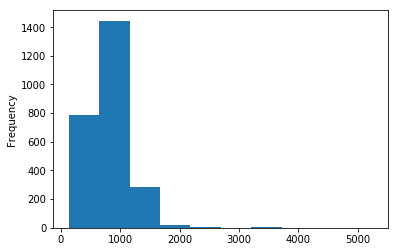

In [18]:
ted['duration'].plot.hist()

In [21]:
# 单人演讲的比例
print('单人演讲的比例{}%'.format(round(ted.query('num_speaker==1').shape[0]*100/len(ted),1)))

单人演讲的比例97.7%


In [24]:
# 演讲时长小于25分钟的比例
print('演讲时长小于20分钟的比例{}%'.format(round(ted.query('duration<=1500').shape[0]*100/len(ted),1)))

演讲时长小于20分钟的比例97.8%


结论
- 演讲人数介于1-5人之间，绝大多数为1个人
- 演讲时长小于25分钟的占97.8%
- 平均每个演讲有191条评论

### 看看大家都喜欢什么样的演讲-浏览量前10的演讲

In [28]:
ted.sort_values('views',ascending=False)[:10]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-25,2006-06-27,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1346,Amy Cuddy: Your body language may shape who yo...,Your body language may shape who you are,"Body language affects how others see us, but i...",Amy Cuddy,Social psychologist,1,1262,TEDGlobal 2012,2012-06-26,2012-10-01,2290,"['body language', 'brain', 'business', 'psycho...",51,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/amy_cuddy_your_body_...,43155405
677,Simon Sinek: How great leaders inspire action,How great leaders inspire action,Simon Sinek has a simple but powerful model fo...,Simon Sinek,Leadership expert,1,1084,TEDxPuget Sound,2009-09-17,2010-05-04,1930,"['TEDx', 'business', 'entrepreneur', 'leadersh...",45,"[{'id': 21, 'name': 'Unconvincing', 'count': 9...","[{'id': 814, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/simon_sinek_how_grea...,34309432
837,Brené Brown: The power of vulnerability,The power of vulnerability,Brené Brown studies human connection -- our ab...,Brené Brown,Vulnerability researcher,1,1219,TEDxHouston,2010-06-06,2010-12-23,1927,"['TEDx', 'communication', 'culture', 'depressi...",52,"[{'id': 10, 'name': 'Inspiring', 'count': 2144...","[{'id': 1391, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/brene_brown_on_vulne...,31168150
452,Mary Roach: 10 things you didn't know about or...,10 things you didn't know about orgasm,"""Bonk"" author Mary Roach delves into obscure s...",Mary Roach,Writer,1,1003,TED2009,2009-02-06,2009-05-20,354,"['books', 'culture', 'history', 'humor', 'scie...",37,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 16, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/mary_roach_10_things...,22270883
1776,Julian Treasure: How to speak so that people w...,How to speak so that people want to listen,"Have you ever felt like you're talking, but no...",Julian Treasure,Sound consultant,1,598,TEDGlobal 2013,2013-06-10,2014-06-27,297,"['culture', 'sound', 'speech']",45,"[{'id': 24, 'name': 'Persuasive', 'count': 267...","[{'id': 1200, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/julian_treasure_how_...,21594632
201,Jill Bolte Taylor: My stroke of insight,My stroke of insight,Jill Bolte Taylor got a research opportunity f...,Jill Bolte Taylor,Neuroanatomist,1,1099,TED2008,2008-02-27,2008-03-12,2877,"['biology', 'brain', 'consciousness', 'global ...",49,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
5,Tony Robbins: Why we do what we do,Why we do what we do,"Tony Robbins discusses the ""invisible forces"" ...",Tony Robbins,Life coach; expert in leadership psychology,1,1305,TED2006,2006-02-02,2006-06-28,672,"['business', 'culture', 'entertainment', 'goal...",36,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
2114,James Veitch: This is what happens when you re...,This is what happens when you reply to spam email,"Suspicious emails: unclaimed insurance bonds, ...",James Veitch,Comedian and writer,1,588,TEDGlobal>Geneva,2015-12-08,2016-01-09,150,"['comedy', 'communication', 'curiosity', 'humo...",43,"[{'id': 7, 'name': 'Funny', 'count': 7731}, {'...","[{'id': 2236, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/james_veitch_t

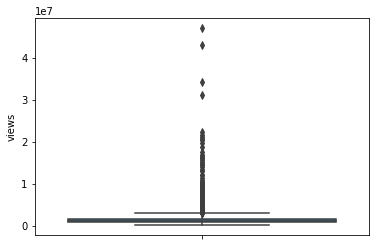

In [29]:
sns.boxplot(y='views',data=ted)

E:\ANACONDA\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


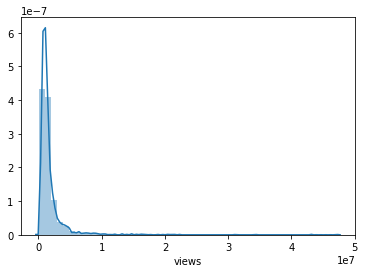

In [30]:
# 分布图
sns.distplot(ted['views'])

E:\ANACONDA\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


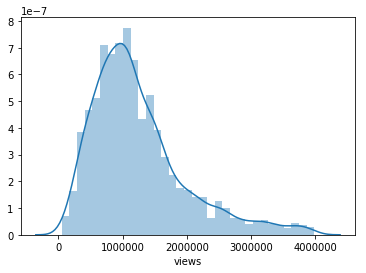

In [31]:
# 浏览量小于400万分布图
sns.distplot(ted.query('views<4000000')['views'])

### 哪些演讲引起了人们的热烈讨论

In [32]:
ted.sort_values('comments',ascending=False)[:10]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views
96,Richard Dawkins: Militant atheism,Militant atheism,Richard Dawkins urges all atheists to openly s...,Richard Dawkins,Evolutionary biologist,1,1750,TED2002,2002-02-02,2007-04-16,6404,"['God', 'atheism', 'culture', 'religion', 'sci...",42,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/richard_dawkins_on_m...,4374792
0,Ken Robinson: Do schools kill creativity?,Do schools kill creativity?,Sir Ken Robinson makes an entertaining and pro...,Ken Robinson,Author/educator,1,1164,TED2006,2006-02-25,2006-06-27,4553,"['children', 'creativity', 'culture', 'dance',...",60,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/ken_robinson_says_sc...,47227110
644,Sam Harris: Science can answer moral questions,Science can answer moral questions,"Questions of good and evil, right and wrong ar...",Sam Harris,"Neuroscientist, philosopher",1,1386,TED2010,2010-02-11,2010-03-22,3356,"['culture', 'evolutionary psychology', 'global...",39,"[{'id': 8, 'name': 'Informative', 'count': 923...","[{'id': 666, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/sam_harris_science_c...,3433437
201,Jill Bolte Taylor: My stroke of insight,My stroke of insight,Jill Bolte Taylor got a research opportunity f...,Jill Bolte Taylor,Neuroanatomist,1,1099,TED2008,2008-02-27,2008-03-12,2877,"['biology', 'brain', 'consciousness', 'global ...",49,"[{'id': 22, 'name': 'Fascinating', 'count': 14...","[{'id': 184, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/jill_bolte_taylor_s_...,21190883
1787,David Chalmers: How do you explain consciousness?,How do you explain consciousness?,Our consciousness is a fundamental aspect of o...,David Chalmers,Philosopher,1,1117,TED2014,2014-03-18,2014-07-14,2673,"['brain', 'consciousness', 'neuroscience', 'ph...",33,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_chalmers_how_d...,2162764
954,Janet Echelman: Taking imagination seriously,Taking imagination seriously,Janet Echelman found her true voice as an arti...,Janet Echelman,Artist,1,566,TED2011,2011-03-03,2011-06-08,2492,"['art', 'cities', 'culture', 'data', 'design',...",35,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/janet_echelman\n,1832930
840,Lesley Hazleton: On reading the Koran,On reading the Koran,Lesley Hazleton sat down one day to read the K...,Lesley Hazleton,"Writer, psychologist",1,573,TEDxRainier,2010-10-10,2011-01-04,2374,"['TEDx', 'culture', 'global issues', 'journali...",35,"[{'id': 3, 'name': 'Courageous', 'count': 488}...","[{'id': 1772, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/lesley_hazelton_on_r...,1847256
1346,Amy Cuddy: Your body language may shape who yo...,Your body language may shape who you are,"Body language affects how others see us, but i...",Amy Cuddy,Social psychologist,1,1262,TEDGlobal 2012,2012-06-26,2012-10-01,2290,"['body language', 'brain', 'business', 'psycho...",51,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 605, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/amy_cuddy_your_body_...,43155405
661,Michael Specter: The danger of science denial,The danger of science denial,"Vaccine-autism claims, ""Frankenfood"" bans, the...",Michael Specter,Writer,1,1141,TED2010,2010-02-11,2010-04-12,2272,"['global issues', 'medicine', 'religion', 'sci...",31,"[{'id': 3, 'name': 'Courageous', 'count': 702}...","[{'id': 801, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/michael_specter_the_...,1838628
677,Simon Sinek: How great leaders inspire action,How great leaders inspire a

In [33]:
# 看看评论数的描述性统计
ted['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

E:\ANACONDA\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


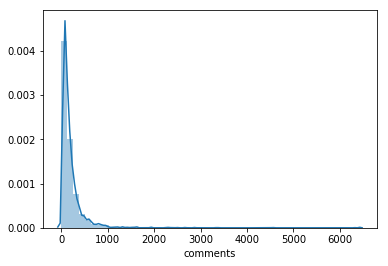

In [34]:
# 看看分布图
sns.distplot(ted['comments'])

E:\ANACONDA\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


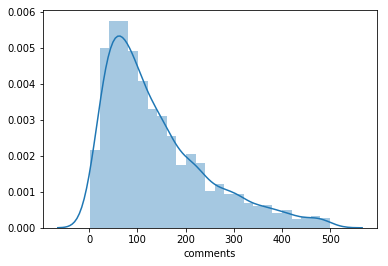

In [35]:
# 看看小于500条的分布
sns.distplot(ted.query('comments<500').comments)

### 浏览量和评论量是否相关

E:\ANACONDA\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
E:\ANACONDA\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


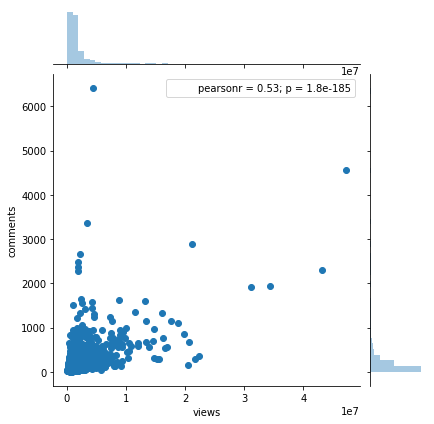

In [37]:
# 联合分布图
sns.jointplot(x='views',y='comments',data=ted)

In [38]:
# 相关矩阵
ted[['views','comments']].corr()

,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


> 从上面可知pearsonr相关系数为0.53属于中等相关程度

### 讨论最热烈的10个视频

In [39]:
# 通过流浪量和评论数组合一个新的字段：讨论指数（评论量/浏览量*10000）
ted['dis_ind'] = round(ted['comments']/ted['views']*10000,1)

In [41]:
ted.sort_values('dis_ind',ascending=False)[:10]

,name,title,description,main_speaker,speaker_occupation,num_speaker,duration,event,film_date,published_date,comments,tags,languages,ratings,related_talks,url,views,dis_ind
744,Diane J. Savino: The case for same-sex marriage,The case for same-sex marriage,Hours before New York lawmakers rejected a key...,Diane J. Savino,Senator,1,453,New York State Senate,2009-12-02,2010-08-18,649,"['God', 'LGBT', 'culture', 'government', 'law'...",0,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/diane_j_savino_the_c...,292395,22.2
803,David Bismark: E-voting without fraud,E-voting without fraud,David Bismark demos a new system for voting th...,David Bismark,Voting system designer,1,422,TEDGlobal 2010,2010-07-14,2010-11-02,834,"['culture', 'democracy', 'design', 'global iss...",36,"[{'id': 25, 'name': 'OK', 'count': 111}, {'id'...","[{'id': 803, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/david_bismark_e_voti...,543551,15.3
96,Richard Dawkins: Militant atheism,Militant atheism,Richard Dawkins urges all atheists to openly s...,Richard Dawkins,Evolutionary biologist,1,1750,TED2002,2002-02-02,2007-04-16,6404,"['God', 'atheism', 'culture', 'religion', 'sci...",42,"[{'id': 3, 'name': 'Courageous', 'count': 3236...","[{'id': 86, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/richard_dawkins_on_m...,4374792,14.6
694,Sharmeen Obaid-Chinoy: Inside a school for sui...,Inside a school for suicide bombers,Filmmaker Sharmeen Obaid-Chinoy takes on a ter...,Sharmeen Obaid-Chinoy,Filmmaker,1,489,TED2010,2010-02-10,2010-05-26,1502,"['TED Fellows', 'children', 'culture', 'film',...",32,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 171, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/sharmeen_obaid_chino...,1057238,14.2
954,Janet Echelman: Taking imagination seriously,Taking imagination seriously,Janet Echelman found her true voice as an arti...,Janet Echelman,Artist,1,566,TED2011,2011-03-03,2011-06-08,2492,"['art', 'cities', 'culture', 'data', 'design',...",35,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 3...","[{'id': 453, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/janet_echelman\n,1832930,13.6
840,Lesley Hazleton: On reading the Koran,On reading the Koran,Lesley Hazleton sat down one day to read the K...,Lesley Hazleton,"Writer, psychologist",1,573,TEDxRainier,2010-10-10,2011-01-04,2374,"['TEDx', 'culture', 'global issues', 'journali...",35,"[{'id': 3, 'name': 'Courageous', 'count': 488}...","[{'id': 1772, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/lesley_hazelton_on_r...,1847256,12.9
876,Elizabeth Lindsey: Curating humanity's heritage,Curating humanity's heritage,"It's been said that when an elder dies, it's a...",Elizabeth Lindsey,"Explorer, ethnographer",1,613,TEDWomen 2010,2010-12-08,2011-02-24,555,"['anthropology', 'storytelling']",30,"[{'id': 21, 'name': 'Unconvincing', 'count': 5...","[{'id': 69, 'hero': 'https://pe.tedcdn.com/ima...",https://www.ted.com/talks/elizabeth_lindsey_cu...,439180,12.6
661,Michael Specter: The danger of science denial,The danger of science denial,"Vaccine-autism claims, ""Frankenfood"" bans, the...",Michael Specter,Writer,1,1141,TED2010,2010-02-11,2010-04-12,2272,"['global issues', 'medicine', 'religion', 'sci...",31,"[{'id': 3, 'name': 'Courageous', 'count': 702}...","[{'id': 801, 'hero': 'https://pe.tedcdn.com/im...",https://www.ted.com/talks/michael_specter_the_...,1838628,12.4
1787,David Chalmers: How do you explain consciousness?,How do you explain consciousness?,Our consciousness is a fundamental aspect of o...,David Chalmers,Philosopher,1,1117,TED2014,2014-03-18,2014-07-14,2673,"['brain', 'consciousness', 'neuroscience', 'ph...",33,"[{'id': 25, 'name': 'OK', 'count': 280}, {'id'...","[{'id': 1308, 'hero': 'https://pe.tedcdn.com/i...",https://www.ted.com/talks/david_chalmers_how_d...,2162764,12.4
561,Mallika Sarabhai: Dance to cha

### 根据时间段分析TED演讲

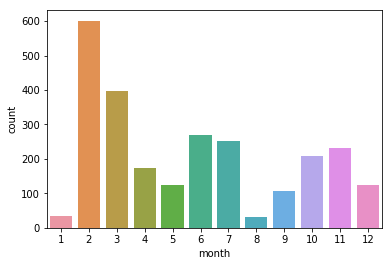

In [47]:
# 按月份分析
# 增加一列month
ted['film_date'] = pd.to_datetime(ted['film_date'],format='%Y-%m-%d')
ted['month'] = ted['film_date'].apply(lambda x:x.month)
sns.countplot(x='month',data=ted)

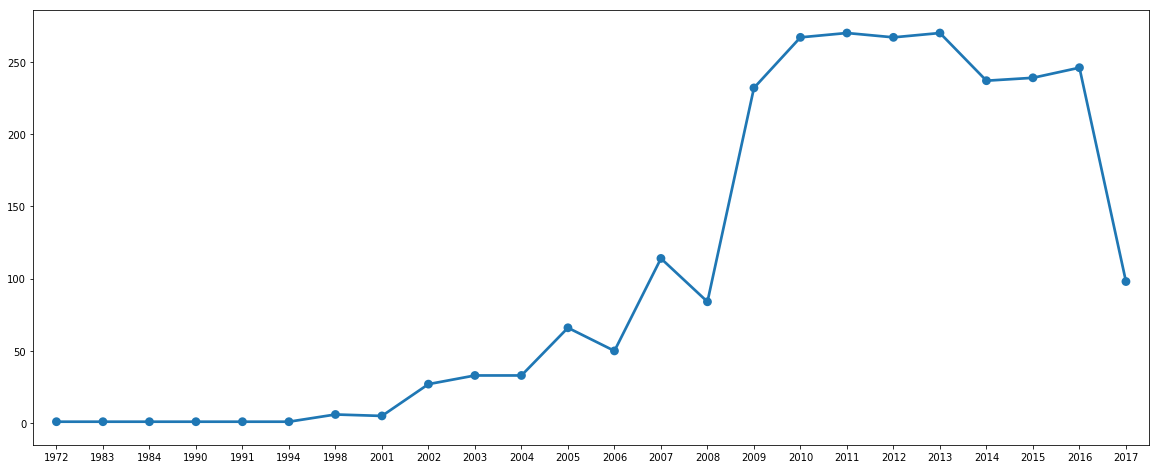

In [52]:
# 按照年份分析
ted['year'] = ted['film_date'].apply(lambda x:x.year)
year_count = ted['year'].value_counts(ascending=False)
plt.figure(figsize=(20,8))
sns.pointplot(x=year_count.index,y=year_count.values)

> TED演讲数量逐年上升，到2019年后稳定在250个左右

In [62]:
# 热图
ted['year_month'] = ted['film_date'].values.astype('datetime64[M]')
ted['year_month'].value_counts()

2014-03-01    90
2009-02-01    83
2016-02-01    83
2012-06-01    82
2015-03-01    78
2011-03-01    76
2013-02-01    75
2010-02-01    70
2013-06-01    70
2011-07-01    70
2017-04-01    68
2009-07-01    65
2007-03-01    62
2010-07-01    59
2014-10-01    57
2008-02-01    47
2011-11-01    46
2015-11-01    46
2006-02-01    44
2012-02-01    42
2010-12-01    41
2009-11-01    40
2016-06-01    39
2012-03-01    38
2016-10-01    38
2005-02-01    37
2015-05-01    35
2012-04-01    33
2003-02-01    31
2004-02-01    30
              ..
2003-03-01     2
2008-10-01     2
2007-01-01     2
2004-03-01     2
2012-01-01     2
2010-08-01     2
2004-10-01     1
2008-01-01     1
2005-09-01     1
2008-09-01     1
2006-03-01     1
1983-07-01     1
2012-08-01     1
2015-02-01     1
1984-02-01     1
1972-05-01     1
2009-08-01     1
2005-03-01     1
2006-09-01     1
2005-11-01     1
1991-12-01     1
2016-08-01     1
2005-06-01     1
2001-05-01     1
2009-12-01     1
1990-03-01     1
2015-07-01     1
1994-02-01    

In [80]:
table2 = ted.pivot_table(index='month',columns='year',values='year_month',aggfunc='count')
table2

year,1972,1983,1984,1990,1991,1994,1998,2001,2002,2003,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,3.0,6.0,2.0,7.0,3.0,2.0,4.0,3.0
2,NaN,NaN,1.0,NaN,NaN,1.0,6.0,4.0,24.0,31.0,...,47.0,83.0,70.0,2.0,42.0,75.0,4.0,1.0,83.0,10.0
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,2.0,...,10.0,5.0,4.0,76.0,38.0,13.0,90.0,78.0,3.0,8.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,27.0,10.0,33.0,15.0,5.0,3.0,11.0,68.0
5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,8.0,2.0,6.0,17.0,18.0,15.0,4.0,35.0,16.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,6.0,11.0,5.0,82.0,70.0,12.0,14.0,39.0,1.0
7,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,65.0,59.0,70.0,5.0,7.0,9.0,1.0,2.0,4.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,2.0,1.0,5.0,4.0,10.0,1.0,4.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,7.0,7.0,9.0,9.0,14.0,20.0,20.0,15.0,NaN


In [81]:
table2 = table2.fillna(0)

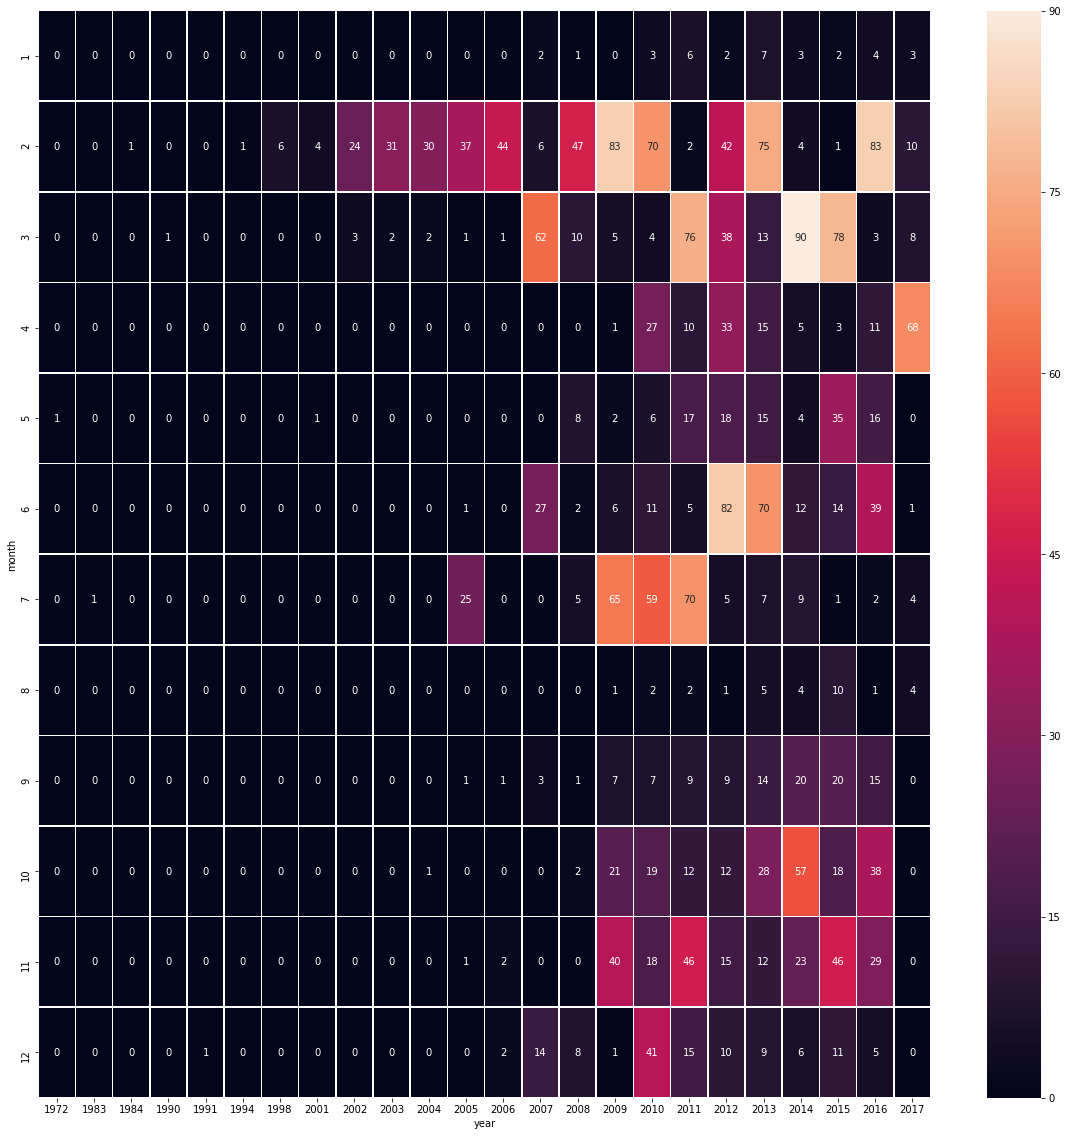

In [85]:
plt.figure(figsize=(20,20))
sns.heatmap(table2,annot=True,linewidths=.5)

### 演讲者们

In [87]:
# 演讲次数最多的人
speaker_df = ted['main_speaker'].value_counts(ascending=False)
speaker_df[:10]

Hans Rosling            9
Juan Enriquez           7
Rives                   6
Marco Tempest           6
Dan Ariely              5
Nicholas Negroponte     5
Clay Shirky             5
Bill Gates              5
Jacqueline Novogratz    5
Julian Treasure         5
Name: main_speaker, dtype: int64

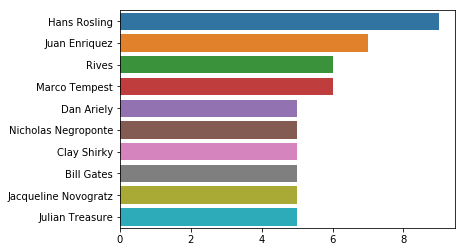

In [90]:
sns.barplot(y=speaker_df[:10].index,x=speaker_df[:10].values)

In [93]:
# 演讲者职业分布
occupation_df = ted['speaker_occupation'].value_counts()
occupation_df[:10]

Writer          45
Artist          34
Designer        34
Journalist      33
Entrepreneur    31
Architect       30
Inventor        27
Psychologist    26
Photographer    25
Filmmaker       21
Name: speaker_occupation, dtype: int64

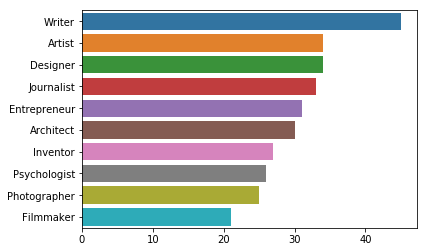

In [94]:
sns.barplot(x=occupation_df[:10].values,y=occupation_df[:10].index)

> 可以看到作家，艺术家，设计师名列前茅

### 演讲主题分析

In [96]:
ted['tags'][0]

"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']"

In [101]:
# [tags]为字符串形式的列表，我们先将其转化为列表
ted['tags'] = ted['tags'].apply(lambda x:eval(x))

In [105]:
from collections import Counter
tags_list = []
for i in ted['tags']:
    for j in i:
        tags_list.append(j)
tags_dict = dict(Counter(tags_list))
len(tags_dict)

416

In [123]:
items = list(tags_dict.items())
items.sort(key=lambda x:x[1],reverse=True)
tags_10 = items[:10]
tags_10

[('technology', 727),
 ('science', 567),
 ('global issues', 501),
 ('culture', 486),
 ('TEDx', 450),
 ('design', 418),
 ('business', 348),
 ('entertainment', 299),
 ('health', 236),
 ('innovation', 229)]

In [131]:
tag_list,value_list = zip(*tags_10)

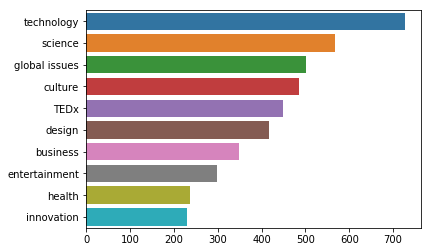

In [134]:
sns.barplot(x=list(value_list),y=list(tag_list))


> 总共有416中标签，其中最多的是技术，科学，全球问题

### TED演讲词汇分析

In [135]:
trans = pd.read_csv('E:/datas/transcripts.csv')
trans.head()

,transcript,url
0,Good morning. How are you?(Laughter)It's been ...,https://www.ted.com/talks/ken_robinson_says_sc...
1,"Thank you so much, Chris. And it's truly a gre...",https://www.ted.com/talks/al_gore_on_averting_...
2,"(Music: ""The Sound of Silence,"" Simon & Garfun...",https://www.ted.com/talks/david_pogue_says_sim...
3,If you're here today — and I'm very happy that...,https://www.ted.com/talks/majora_carter_s_tale...
4,"About 10 years ago, I took on the task to teac...",https://www.ted.com/talks/hans_rosling_shows_t...


In [136]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 2 columns):
transcript    2467 non-null object
url           2467 non-null object
dtypes: object(2)
memory usage: 38.6+ KB


In [139]:
# 计算演讲词汇量
trans['wc'] = trans['transcript'].apply(lambda x:len(x.split()))
trans['wc'].describe()

count    2467.000000
mean     2040.279287
std       956.209248
min         1.000000
25%      1332.500000
50%      2028.000000
75%      2707.000000
max      9044.000000
Name: wc, dtype: float64

E:\ANACONDA\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


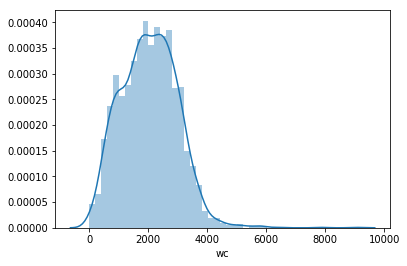

In [140]:
sns.distplot(trans['wc'])

### 绘制词云

In [149]:
corpus = ' '.join(trans['transcript'])
corpus = corpus.replace('.', '. ')

#建立云图
from wordcloud import WordCloud, STOPWORDS
tedwordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=2400,height=2000).generate(corpus)

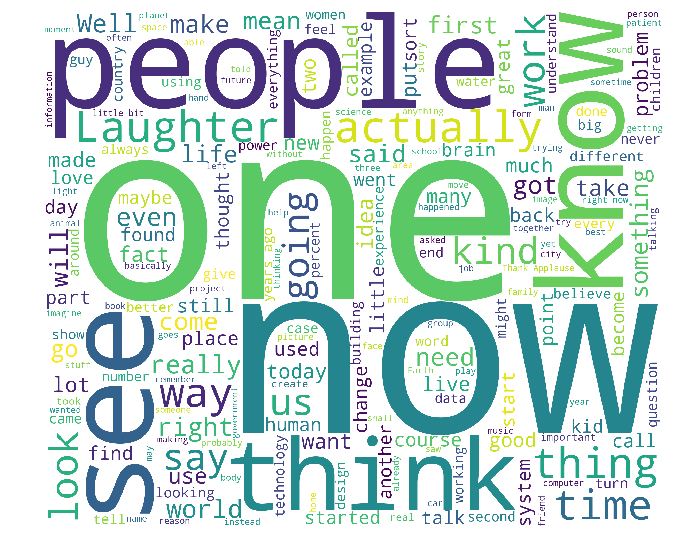

In [151]:
plt.figure(figsize = (10,10),dpi=80)
plt.imshow(tedwordcloud)
plt.axis('off')
plt.show()